In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools

warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data

In [2]:
#importing data from csv file
data = pd.read_csv(r"data/pulsar_stars.csv")
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Note:
* Kurtosis is the average (or expected value) of the standardized data raised to the fourth power. Any standardized values that are less than 1 (i.e., data within one standard deviation of the mean, where the "peak" would be), contribute virtually nothing to kurtosis, since raising a number that is less than 1 to the fourth power makes it closer to zero. The only data values (observed or observable) that contribute to kurtosis in any meaningful way are those outside the region of the peak; i.e., the outliers. Therefore, kurtosis measures outliers only; it measures nothing about the "peak". The skewness of a random variable X is the fourth standardized moment.

* skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined. The skewness of a random variable X is the third standardized moment.

In [3]:
data.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [4]:
data.count()

 Mean of the integrated profile                  17898
 Standard deviation of the integrated profile    17898
 Excess kurtosis of the integrated profile       17898
 Skewness of the integrated profile              17898
 Mean of the DM-SNR curve                        17898
 Standard deviation of the DM-SNR curve          17898
 Excess kurtosis of the DM-SNR curve             17898
 Skewness of the DM-SNR curve                    17898
target_class                                     17898
dtype: int64

In [5]:
print(data.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [6]:
data.columns.tolist

<bound method IndexOpsMixin.tolist of Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')>

In [7]:
#Renaming columns
data = data.rename(
    columns={
        ' Mean of the integrated profile':'mean_profile',
        ' Standard deviation of the integrated profile':'std_profile',
        ' Excess kurtosis of the integrated profile':'kurtosis_profile',
        ' Skewness of the integrated profile':'skewness_profile', 
        ' Mean of the DM-SNR curve':'mean_dmsnr_curve',
        ' Standard deviation of the DM-SNR curve':'std_dmsnr_curve',
        ' Excess kurtosis of the DM-SNR curve':'kurtosis_dmsnr_curve',
        ' Skewness of the DM-SNR curve':'skewness_dmsnr_curve',
       })

## Correlation between features

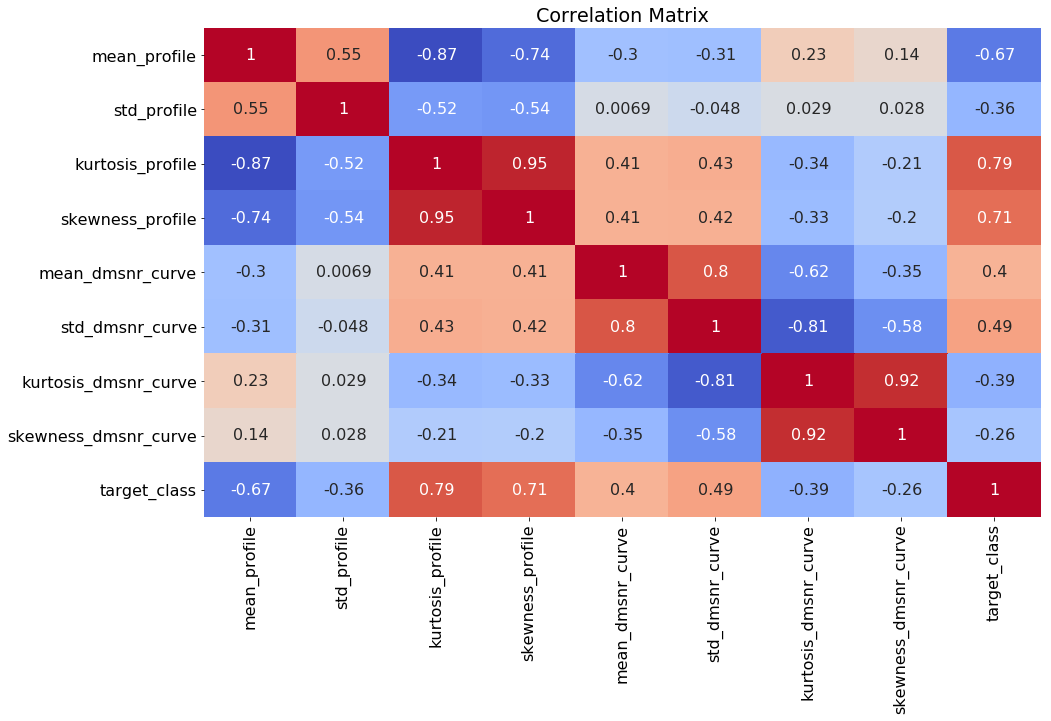

In [8]:
correlation = data.corr(method='pearson')

plt.rcParams.update({'font.size':16})
fig, ax = plt.subplots(figsize=(15,9))

sns.heatmap(correlation, annot=True,
            cmap=plt.get_cmap('coolwarm'),
            cbar=False, ax=ax)

plt.title("Correlation Matrix")
plt.show()

#plt.savefig('Correlation_matrix.jpeg', bbox_inches='tight', pad_inches=0.0)

## Pairplots

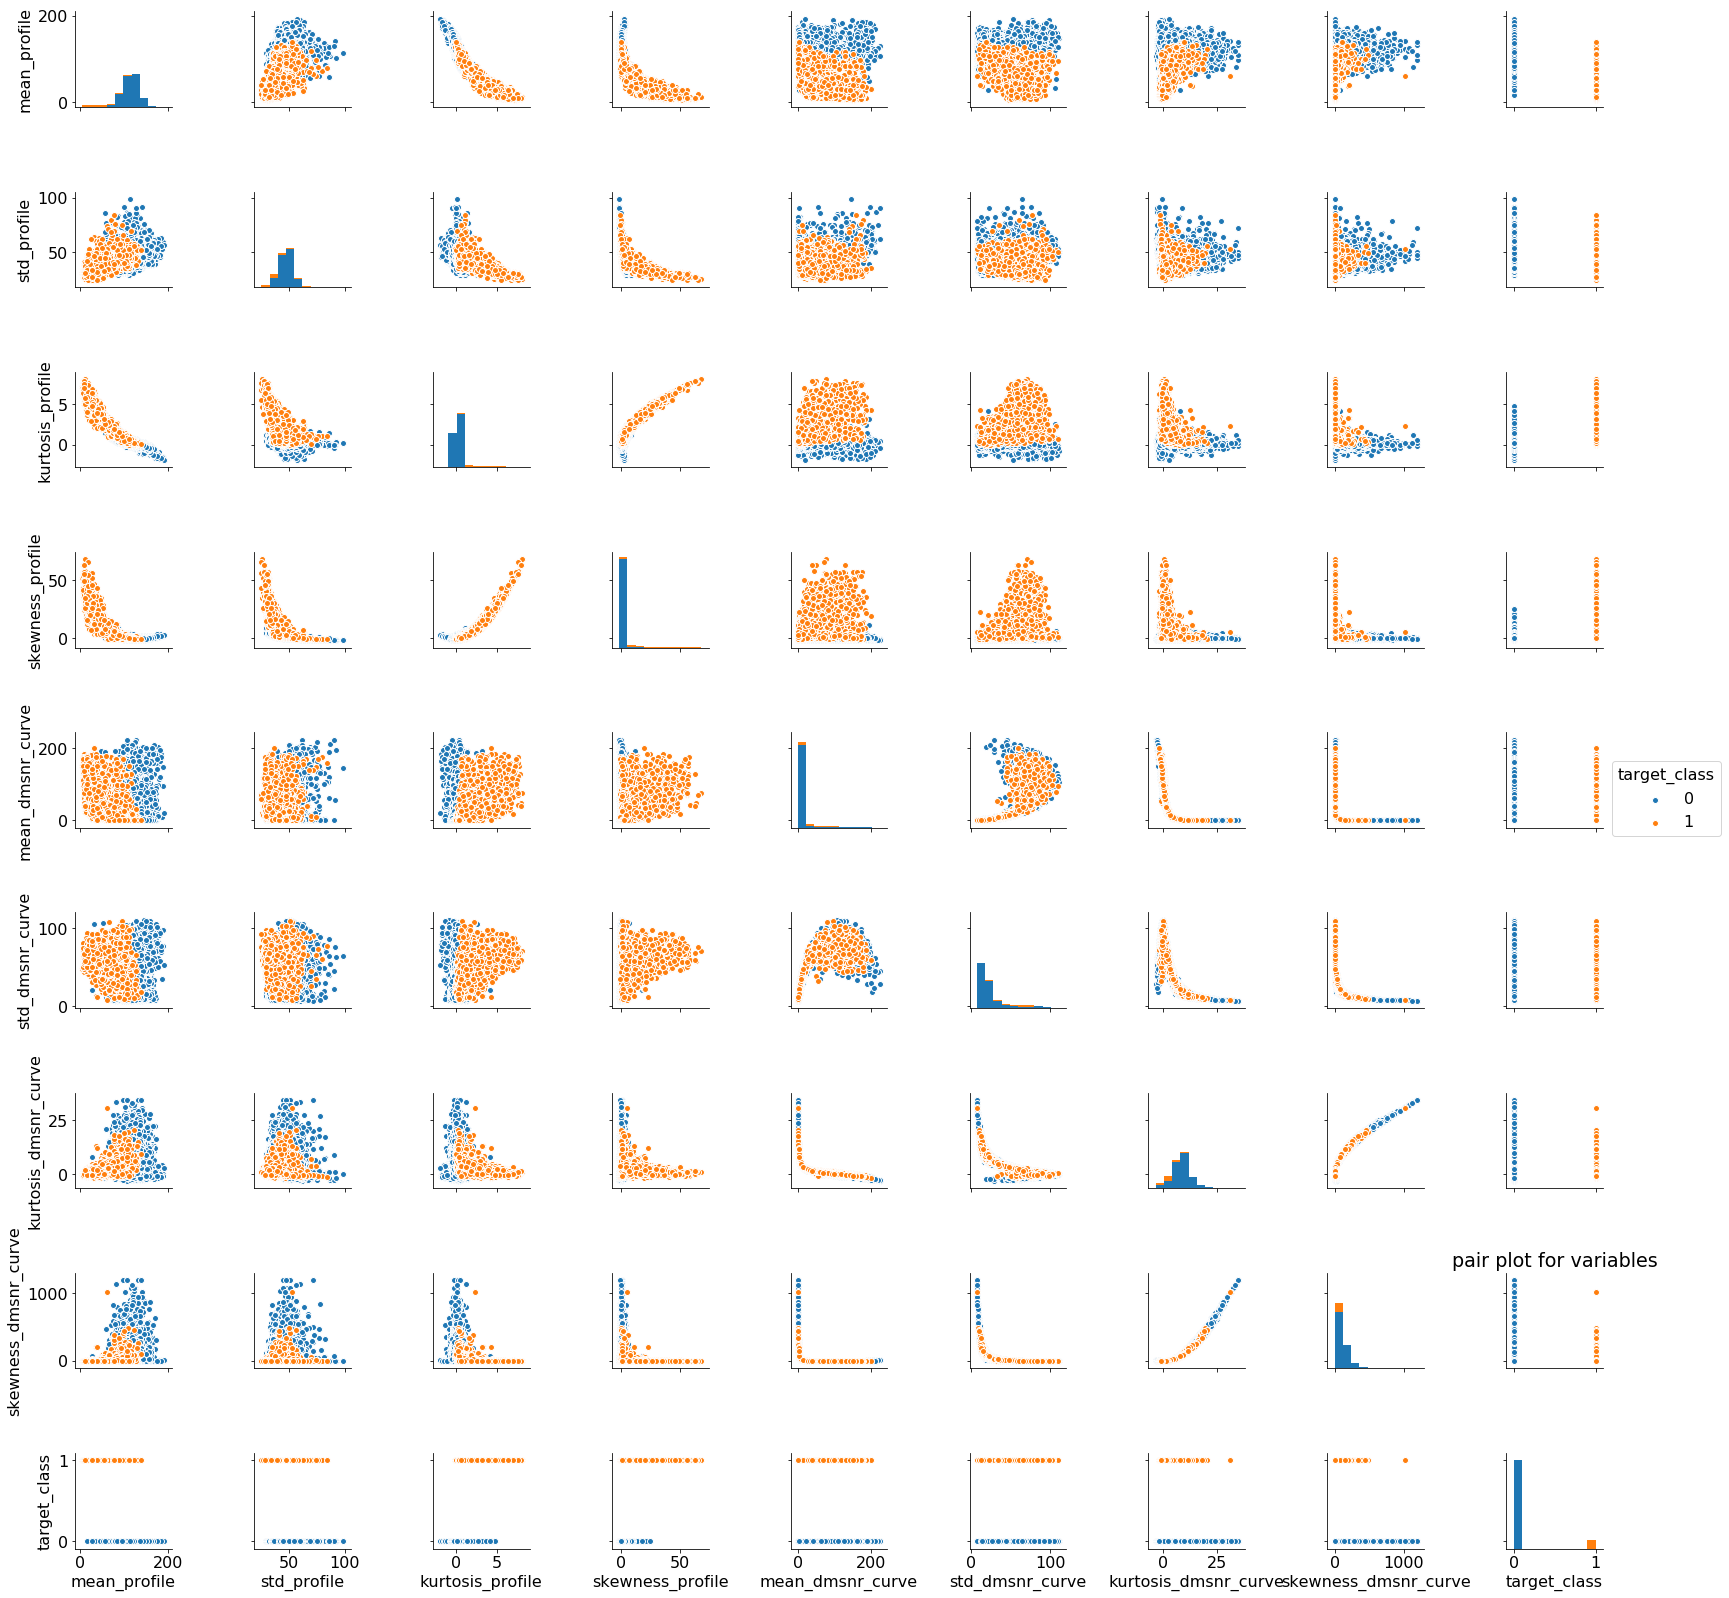

In [9]:
sns.pairplot(data, hue="target_class")
plt.title("pair plot for variables")

plt.show()

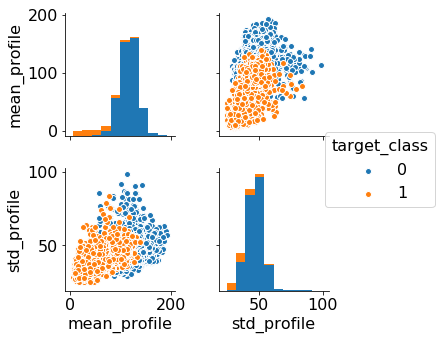

In [10]:
sns.pairplot(data, vars=["mean_profile", "std_profile"], hue="target_class")

## Proportion of target variable in dataframe

0    16259
1     1639
Name: target_class, dtype: int64


Text(0.5,1,'Count of target variable')

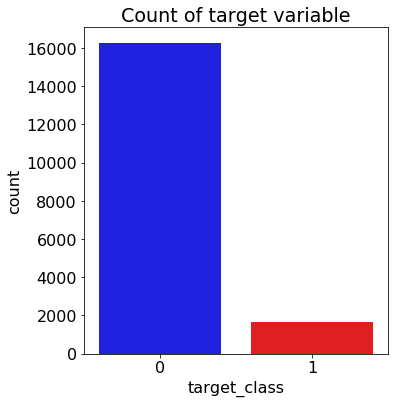

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(121)

ax = sns.countplot(x = data["target_class"],
                   palette=["b","r"],
                   linewidth=1)

print(data["target_class"].value_counts())
    
plt.title("Count of target variable")

## Distribution of variables in the dataset

Distribution of variables in the dataset


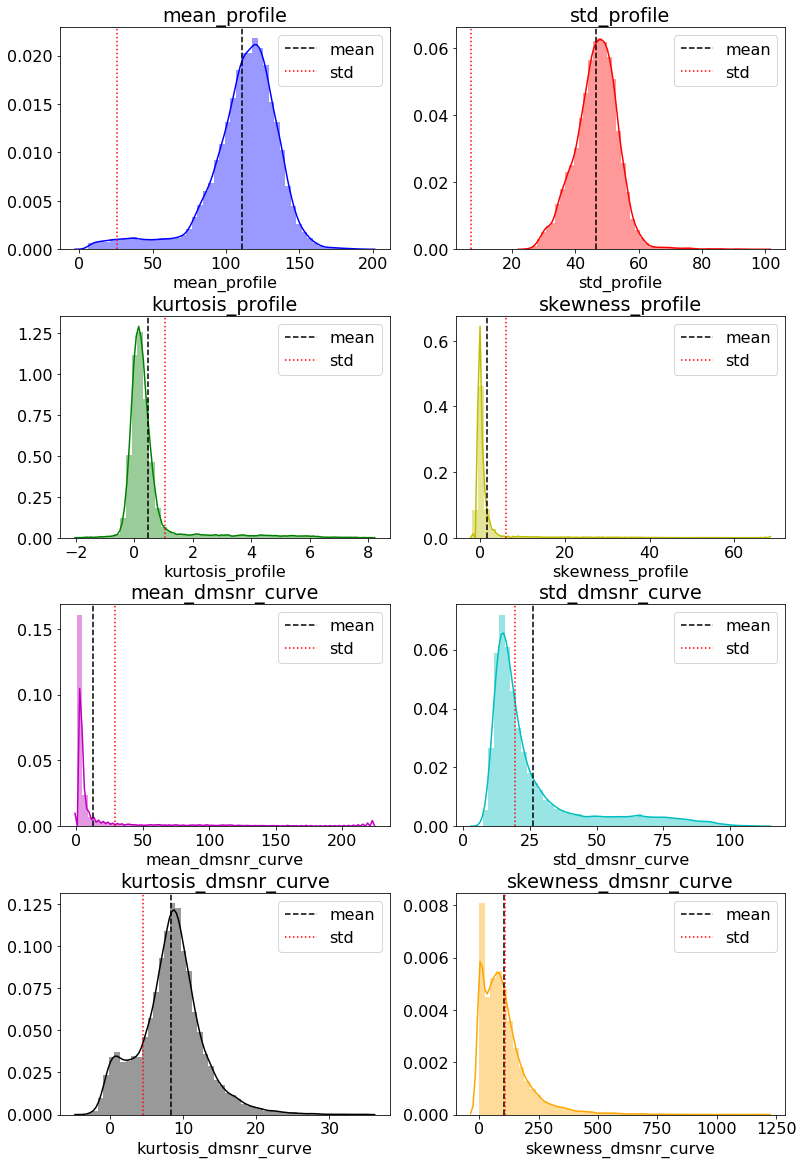

In [12]:
columns = [
    'mean_profile', 
    'std_profile', 
    'kurtosis_profile', 
    'skewness_profile',
    'mean_dmsnr_curve', 
    'std_dmsnr_curve', 
    'kurtosis_dmsnr_curve',
    'skewness_dmsnr_curve']

length  = len(columns)
colors  = ["b","r","g","y","m","c","k","orange"] 
plt.figure(figsize=(13,20))

for column,j,k in itertools.zip_longest(columns, range(length), colors):
    plt.subplot(length/2,length/4,j+1)
    sns.distplot(data[column], color=k)
    plt.title(column)
    plt.subplots_adjust(hspace = .3)
    plt.axvline(data[column].mean(), color = "black", linestyle="dashed", label="mean")
    plt.axvline(data[column].std(), color = "red", linestyle="dotted", label="std")
    plt.legend(loc="upper right")
    
print ("Distribution of variables in the dataset")

## Violin plots

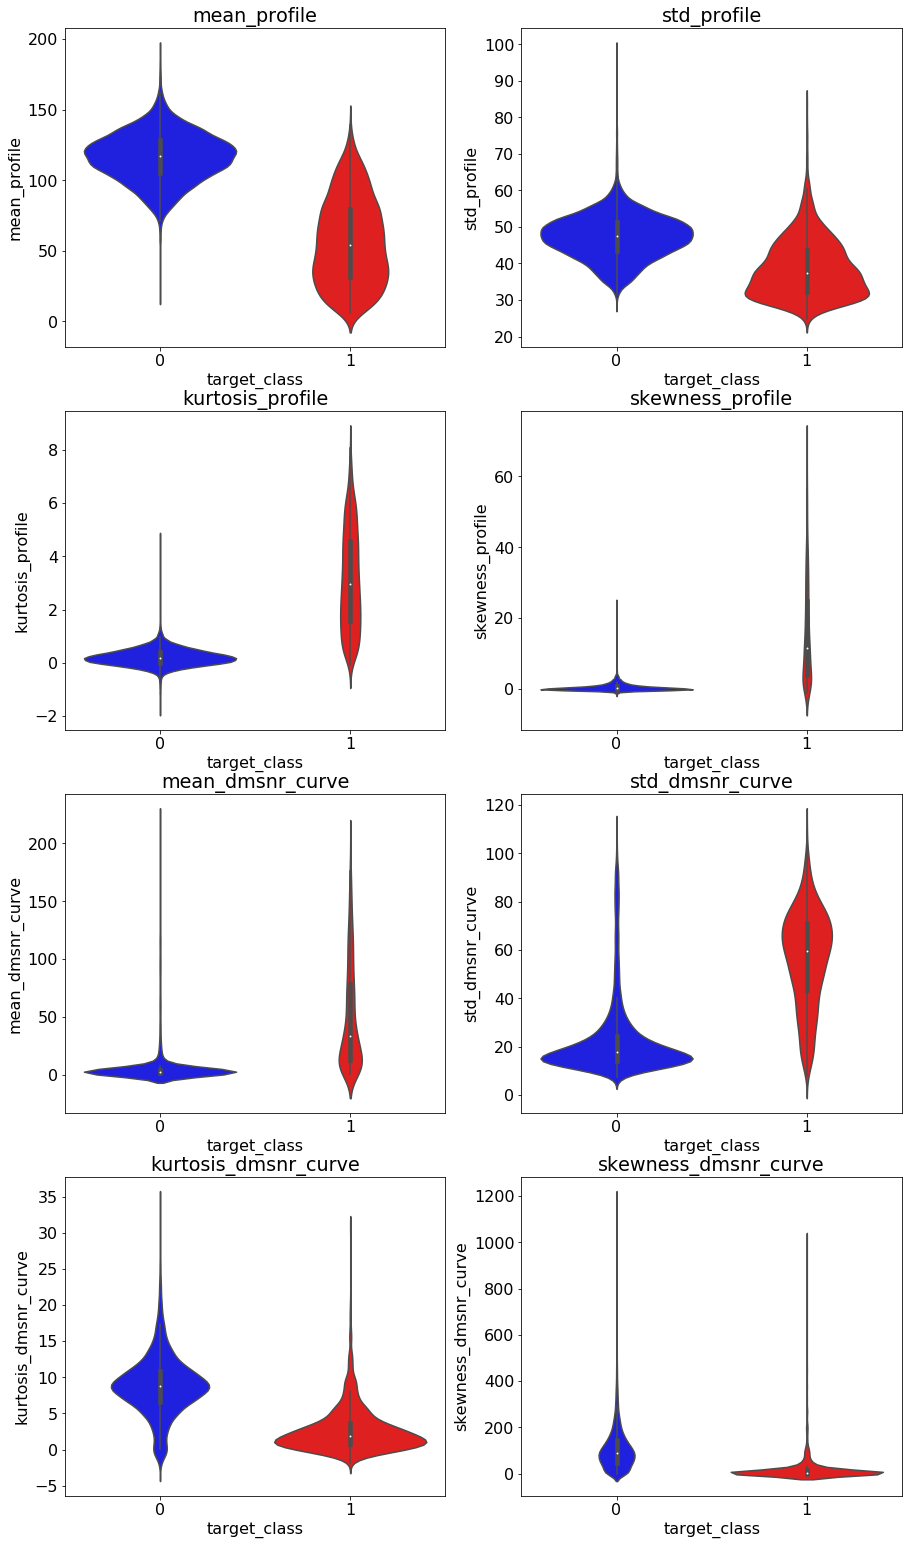

In [13]:
columns = [x for x in data.columns if x not in ["target_class"]]
length  = len(columns)

plt.figure(figsize=(15,27))

for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=data["target_class"],y=data[i],
                   palette=["blue","red"],alpha=.5)
    plt.title(i)

## Splitting the data

In [14]:
X = data.drop("target_class", axis=1)
y = data["target_class"]

### Not Stratified

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [16]:
print(y_train.value_counts())
print(y_test.value_counts())

0    11375
1     1153
Name: target_class, dtype: int64
0    4884
1     486
Name: target_class, dtype: int64


In [17]:
print(1153/(11375+1153))
print(486/(4884+486))

0.0920338441890166
0.09050279329608939


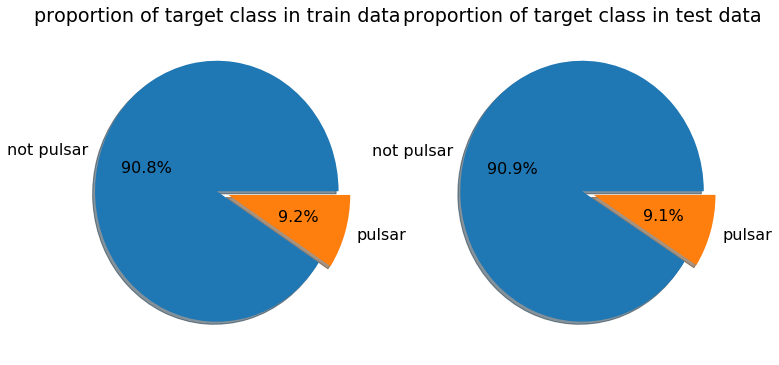

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(121)

y_train.value_counts().plot.pie(labels = ["not pulsar","pulsar"],
                                              autopct = "%1.1f%%",
                                              shadow = True,explode=[0,.1])

plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)

y_test.value_counts().plot.pie(labels = ["not pulsar","pulsar"],
                               autopct = "%1.1f%%",
                               shadow = True,
                               explode=[0,.1])

plt.title("proportion of target class in test data")
plt.ylabel("")
plt.show()

### Stratified

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [20]:
print(y_train.value_counts())
print(y_test.value_counts())

0    13007
1     1311
Name: target_class, dtype: int64
0    3252
1     328
Name: target_class, dtype: int64


In [21]:
print(1311/(13007+1311))
print(328/(3252+328))

0.09156306746752339
0.09162011173184358


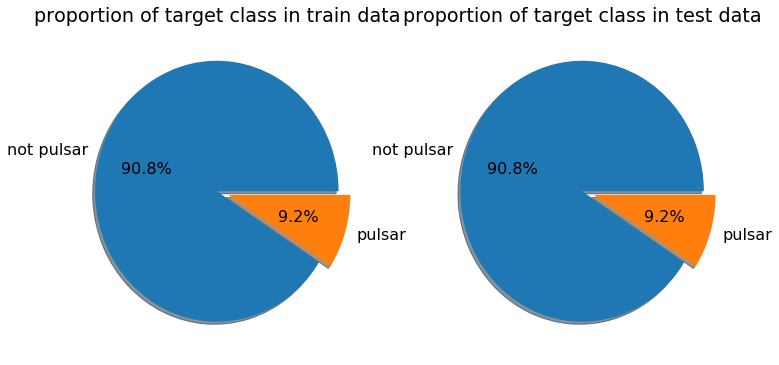

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(121)

y_train.value_counts().plot.pie(labels = ["not pulsar","pulsar"],
                                autopct = "%1.1f%%",
                                shadow = True,
                                explode=[0,.1])

plt.title("proportion of target class in train data")
plt.ylabel("")
plt.subplot(122)

y_test.value_counts().plot.pie(labels = ["not pulsar","pulsar"],
                               autopct = "%1.1f%%",
                               shadow = True,
                               explode=[0,.1])

plt.title("proportion of target class in test data")
plt.ylabel("")
plt.show()

## Standardization

In [23]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = X.columns)

X_train.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr_curve,std_dmsnr_curve,kurtosis_dmsnr_curve,skewness_dmsnr_curve
0,-2.679468,-1.794780,2.859542,2.736437,2.311142,2.342991,-1.705897,-0.990758
1,0.189534,-0.660269,-0.273553,-0.251198,-0.354042,-0.477316,0.262380,-0.039444
2,0.685463,0.309251,-0.515737,-0.306285,-0.343045,-0.498906,0.313011,0.088894
3,-1.146789,-0.572230,0.541662,0.064033,-0.324271,-0.275975,-0.156348,-0.402258
4,-2.020468,-1.221019,2.120507,1.471655,0.818519,1.840794,-1.447761,-0.963234


In [25]:
from sklearn.externals import joblib

# Save it
scaler_filename = "my_scaler.save"
joblib.dump(scaler, scaler_filename) 

# Load it 
scaler = joblib.load(scaler_filename) 
print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


The same scaling and shifting operations is applied to X_test to be consistent with the transformation performed on the train data:

In [26]:
X_test = scaler.transform(X_test)

## Model 

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier 

In [29]:
def model(algorithm, train_x, train_y, test_x, test_y, type_importance):
    
    print ("***********************************************************************")
    print ("MODEL -- OUTPUT")
    print ("***********************************************************************")
    
    algorithm.fit(train_x, train_y)
    predictions = algorithm.predict(test_x)
    
    print (algorithm)
    print ("\naccuracy_score :", accuracy_score(test_y, predictions))
    
    #target_names = ['class 0', 'class 1', 'class 2']
    #target_names = target_names
    
    print ("\nclassification report :\n",(classification_report(test_y, predictions))) #target_names=target_names
        
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(
        confusion_matrix(test_y, predictions),
        annot=True,
        fmt="d",
        linecolor="k",
        linewidths=3,
        cmap="YlGnBu")
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = algorithm.predict_proba(test_x)[:,1] #In general access prediction[:,k] if you want likelihood of the k th class
    fpr, tpr, thresholds = roc_curve(test_y, predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr, tpr, label = ("Area_under the curve :", auc(fpr,tpr)), color = "b")
    plt.plot([1,0],[1,0], linestyle = "dashed", color ="k")
    plt.legend(loc = "best", prop={'size': 10})
    plt.title("ROC CURVE & AREA UNDER CURVE", fontsize=20)
    
    if  type_importance == "feature":
        
        df = pd.DataFrame(algorithm.feature_importances_, train_x.columns).reset_index()
        df = df.rename(columns={"index":"features", 0:"coefficients"})
        df = df.sort_values(by="coefficients", ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x="coefficients", y="features", data=df, palette="husl")
        plt.title("FEATURE IMPORTANCES", fontsize =20)
        for i,j in enumerate(df["coefficients"]):
            ax.text(.011, i, j, weight = "bold")
    
    elif type_importance == "coefficients" :
        
        df = pd.DataFrame(algorithm.coef_.ravel(), train_x.columns).reset_index()
        df = df.rename(columns={"index":"features", 0:"coefficients"})
        df = df.sort_values(by="coefficients", ascending = False)
        plt.subplot(223)
        ax = sns.barplot(x="coefficients", y="features", data=df, palette="husl")
        plt.title("FEATURE IMPORTANCES", fontsize =20)
        for i,j in enumerate(df["coefficients"]):
            ax.text(.011, i, j, weight = "bold")
            
    elif type_importance == "none":
        return (algorithm)

### Logistic regression

***********************************************************************
MODEL -- OUTPUT
***********************************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

accuracy_score : 0.979608938547486

classification report :
              precision    recall  f1-score   support

          0       0.98      1.00      0.99      3252
          1       0.94      0.83      0.88       328

avg / total       0.98      0.98      0.98      3580



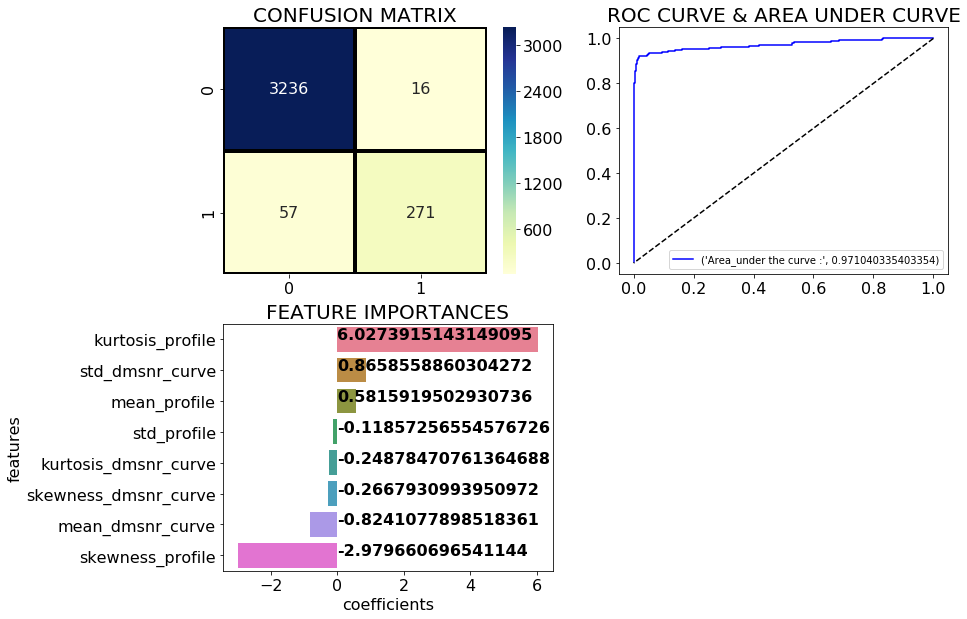

In [30]:
log = LogisticRegression()
model(log, X_train, y_train, X_test, y_test, "coefficients")

### K- Nearest Neighbour Classifier

***********************************************************************
MODEL -- OUTPUT
***********************************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

accuracy_score : 0.9804469273743017

classification report :
              precision    recall  f1-score   support

          0       0.98      0.99      0.99      3252
          1       0.93      0.85      0.89       328

avg / total       0.98      0.98      0.98      3580



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

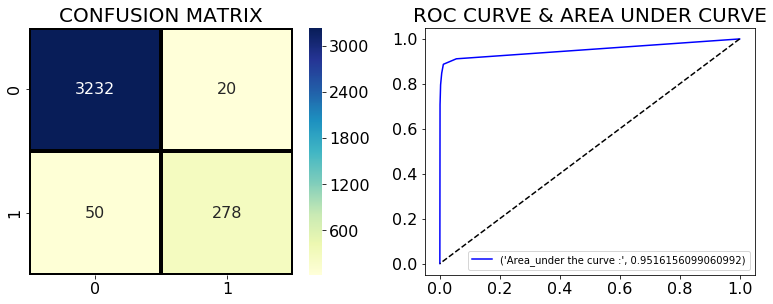

In [31]:
knn = KNeighborsClassifier()
model(knn, X_train, y_train, X_test, y_test, "none")

### Random forest

***********************************************************************
MODEL -- OUTPUT
***********************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

accuracy_score : 0.979608938547486

classification report :
              precision    recall  f1-score   support

          0       0.98      0.99      0.99      3252
          1       0.93      0.84      0.88       328

avg / total       0.98      0.98      0.98      3580



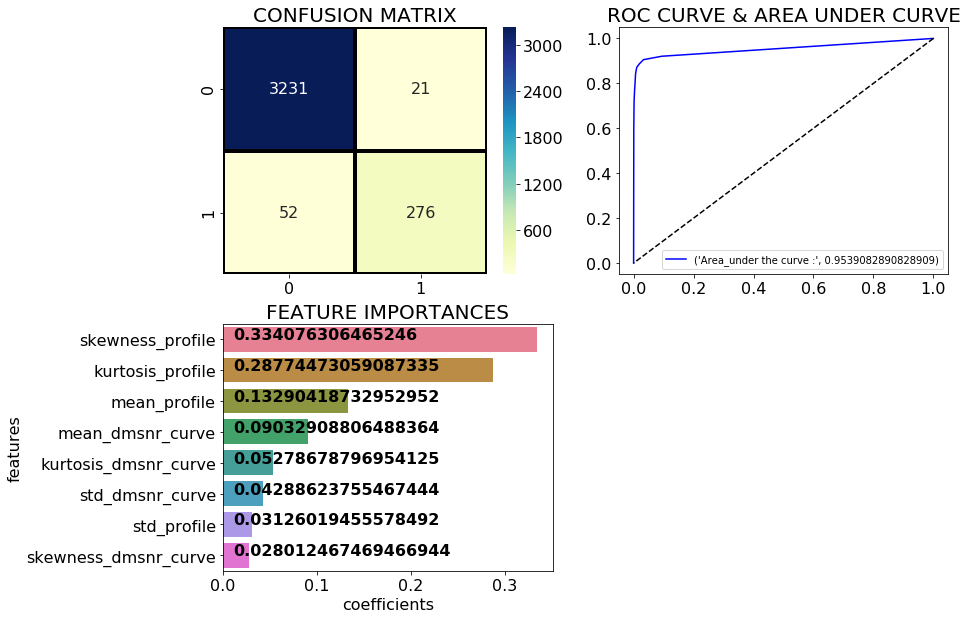

In [32]:
rf = RandomForestClassifier()
model(rf, X_train, y_train, X_test, y_test, "feature")

***********************************************************************
MODEL -- OUTPUT
***********************************************************************
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

accuracy_score : 0.9815642458100559

classification report :
              precision    recall  f1-score   support

          0       0.99      0.99      0.99      3252
          1       0.93      0.87      0.90       328

avg / total       0.98      0.98      0.98      3580



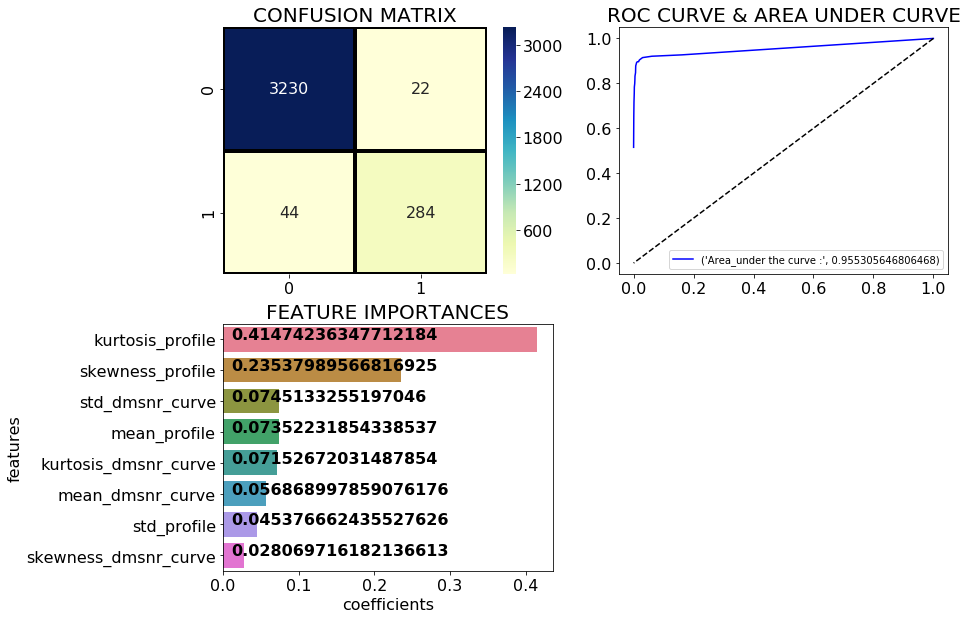

In [33]:
rf = RandomForestClassifier(n_estimators=20)
model(rf, X_train, y_train, X_test, y_test, "feature")

### Gradient Boosting

***********************************************************************
MODEL -- OUTPUT
***********************************************************************
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

accuracy_score : 0.9810055865921787

classification report :
              precision    recall  f1-score   support

          0       0.99      0.99      0.99      3252
          1       0.92      0.87      0.89       328

avg / total       0.98      0.98      0.98      3580



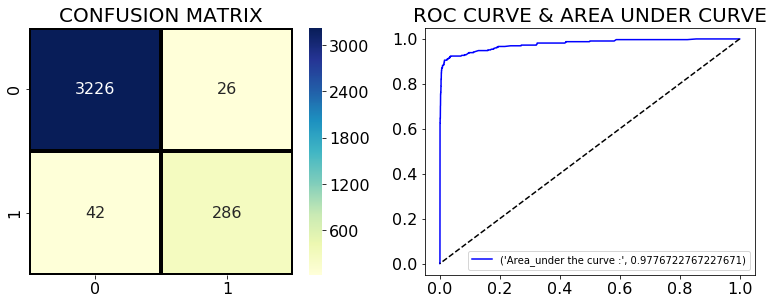

In [34]:
gbc = GradientBoostingClassifier()
model(gbc, X_train, y_train, X_test, y_test, "feat")

### Ensemble model

In [35]:
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

def ensemble_model(estimators, train_x, train_y, test_x, test_y):
    
    print ("***********************************************************************")
    print ("MODEL -- OUTPUT")
    print ("***********************************************************************")
    
    voting_clf = VotingClassifier(
        estimators = estimators,
        voting = "soft"
    )
    
    voting_clf.fit(train_x, train_y)
    predictions = voting_clf.predict(test_x)
    
    print ("\nclassification report :\n",(classification_report(test_y, predictions)))
    
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(
        confusion_matrix(test_y, predictions),
        annot=True,
        fmt="d",
        linecolor="k",
        linewidths=3,
        cmap="YlGnBu")
    plt.title("CONFUSION MATRIX",fontsize=20)
    
    predicting_probabilites = voting_clf.predict_proba(test_x)[:,1] #In general access prediction[:,k] if you want likelihood of the k th class
    fpr, tpr, thresholds = roc_curve(test_y, predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr, tpr, label = ("Area_under the curve :", auc(fpr,tpr)), color = "b")
    plt.plot([1,0],[1,0], linestyle = "dashed", color ="k")
    plt.legend(loc = "best", prop={'size': 10})
    plt.title("ROC CURVE & AREA UNDER CURVE", fontsize=20)

***********************************************************************
MODEL -- OUTPUT
***********************************************************************

classification report :
              precision    recall  f1-score   support

          0       0.99      0.99      0.99      3252
          1       0.93      0.87      0.90       328

avg / total       0.98      0.98      0.98      3580



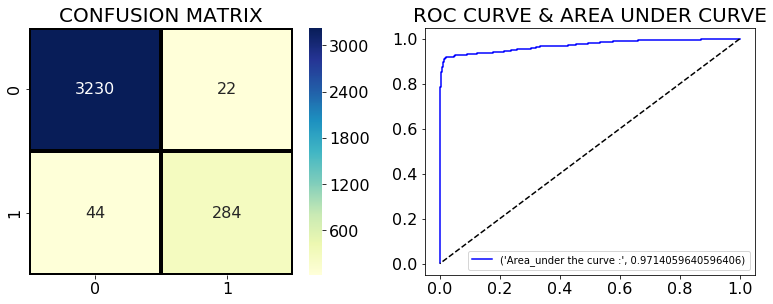

In [36]:
estimators = [('log', log), ('knn', knn), ('gbc', gbc), ('rf', rf)]

ensemble_model(estimators, X_train, y_train, X_test, y_test)

### Best combination for the ensemble (Best model)

***********************************************************************
MODEL -- OUTPUT
***********************************************************************

classification report :
              precision    recall  f1-score   support

          0       0.99      0.99      0.99      3252
          1       0.94      0.87      0.90       328

avg / total       0.98      0.98      0.98      3580



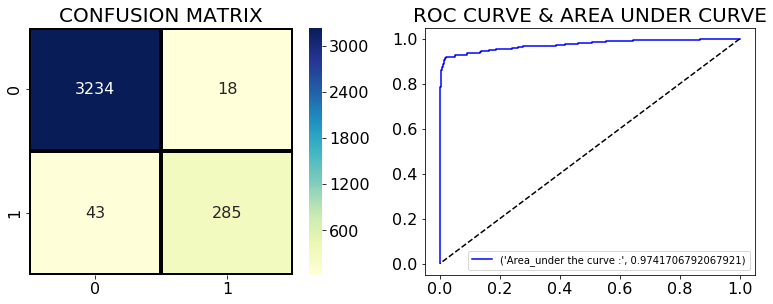

In [37]:
estimators = [('log', log), ('knn', knn), ('gbc', gbc)]

ensemble_model(estimators, X_train, y_train, X_test, y_test)